# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [54]:
apple_df=pd.read_csv('appl_1980_2014.csv')

### Step 3. Assign it to a variable apple

In [55]:
apple_df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [7]:
#Checking data types of the columns
apple_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [56]:
apple_df['Date']=apple_df['Date'].astype('datetime64')

In [57]:
apple_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [108]:
apple_df.set_index('Date',inplace=True)

### Step 7.  Is there any duplicate dates?

In [109]:
apple_df.index.duplicated().sum()
#No, there is no duplicate in dates

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [110]:
apple_df[::-1]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [116]:
apple_df.index

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)

In [123]:
apple_df.index.day


Int64Index([ 8,  7,  3,  2,  1, 30, 27, 26, 25, 24,
            ...
            26, 24, 23, 22, 19, 18, 17, 16, 15, 12],
           dtype='int64', name='Date', length=8465)

### Step 10.  What is the difference in days between the first day and the oldest

In [125]:
apple_df.index[0]-apple_df.index[8464]

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [130]:
apple_df.index.month.value_counts()

3     744
8     730
10    728
6     727
5     718
12    711
1     705
7     703
4     703
11    675
9     669
2     652
Name: Date, dtype: int64

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

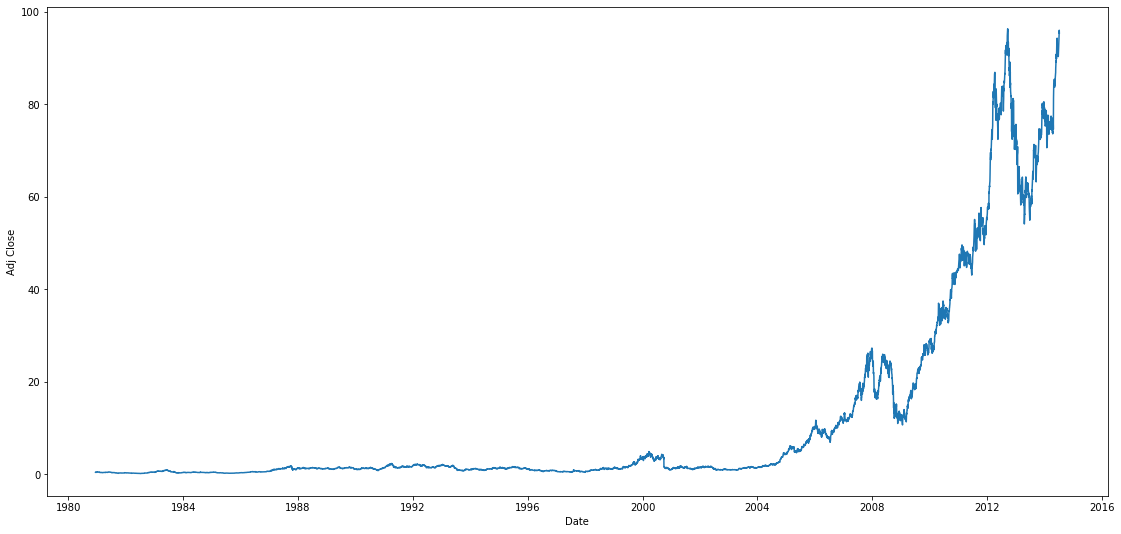

In [94]:
plt.figure(figsize=(19,9))
sns.lineplot(x=apple_df['Date'],y=apple_df['Adj Close']);

### BONUS: Create your own question and answer it.

### Comparing Open, High, Low, Close trend over different period

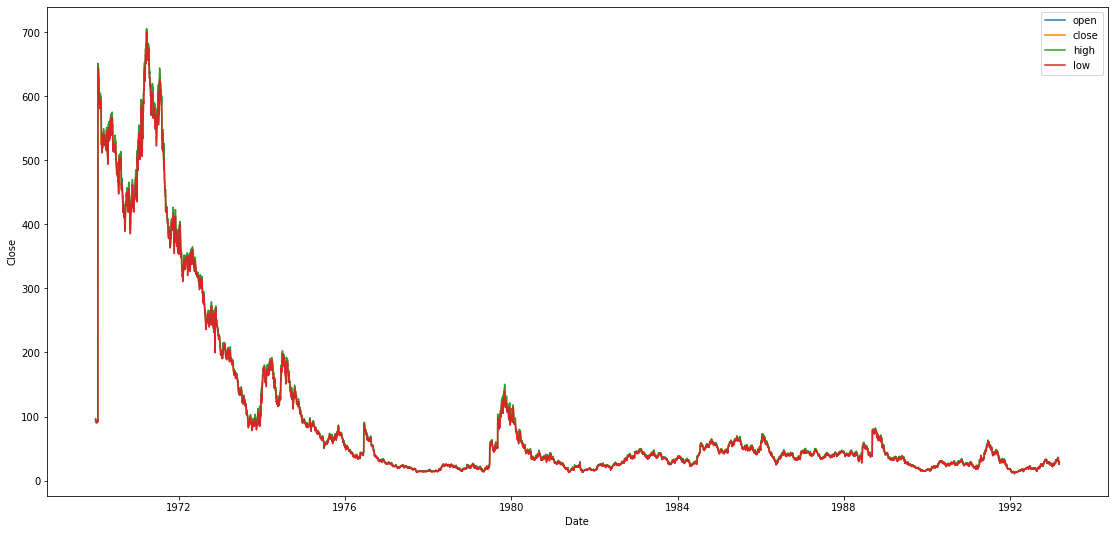

In [104]:
plt.figure(figsize=(19,9))
sns.lineplot(x=apple_df['Date'],data=apple_df['Open'],label='open')
sns.lineplot(data=apple_df['Close'],label='close')
sns.lineplot(data=apple_df['High'],label='high')
sns.lineplot(data=apple_df['Low'],label='low');